In [2]:
!pip install catboost

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
    --------------------------------------- 1.3/101.8 MB 11.2 MB/s eta 0:00:10
   - -------------------------------------- 2.9/101.8 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 4.5/101.8 MB 8.4 MB/s eta 0:00:12
   -- ------------------------------------- 5.5/101.8 MB 7.1 MB/s eta 0:00:14
   -- ------------------------------------- 6.6/101.8 MB 6.8 MB/s eta 0:00:14
   --- ------------------------------------ 9.2/101.8 MB 7.6 MB/s eta 0:00:13
   ---- ----------------------------------- 11.0/101.8 MB 7.8 MB/s eta 0:00:12
   ---- ----------------------------------- 12.1/101.8 MB 7.9 MB/s eta 0:00:12
   ----- ---------------------------------- 13.9/101.8 MB 7.5 MB/s eta 0:00:12
   ------ --------------------------------- 17.0/101.8 MB 8.3 MB/s eta 0:00:11
   ------- -------------------------------- 18.6/101.8 MB 8.2 MB/s eta 0:00:11
   -------- ------------------------------- 20.7/101.8 MB 8.4 MB/

  You can safely remove it manually.
  You can safely remove it manually.


In [8]:
# Basic Import 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
# Modelling 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV 
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
import warnings

In [9]:
df=pd.read_csv('data/stu.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
x=df.drop(columns=['math score'],axis=1)

In [12]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
y=df['math score']

In [14]:
y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [15]:
#create a column transformer
num_feature=x.select_dtypes(exclude="object").columns
cat_feature=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_tranformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("oneHotEncoder",oh_transformer, cat_feature),
        ("StandardScaler", num_tranformer,num_feature)
    ]
)

In [16]:
x=preprocessor.fit_transform(x)


In [17]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
x_train.shape

(800, 19)

In [21]:
def evaluate_model(true, predicted):
    mse=mean_absolute_error(true, predicted)
    mae=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2=r2_score(true, predicted)
    return mae, mse, r2, rmse


In [22]:
models={
    "Linear Regression":LinearRegression(),
    "lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Decision TreeRegressor":DecisionTreeRegressor(),
    "random forest regresson":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(x_train,y_train)

    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ##training performance
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2=evaluate_model(y_train, y_train_pred)

    ## test set performamnce
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2=evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])

    print('model performance fro training set')
    print("-Mean error {:.4f}".format(model_train_mae))
    print("-Mean squared error{:.4f}".format(model_train_mse))
    print("-root mean error {:.4f}".format(model_train_rmse))
    print("-r2_score {:.4f}".format(model_train_r2))
    # print("-roc auc score {:.4f}".format(model_train_rouac_score))

    print('----------------------------')

    print('Model performace for the test set')
    print("-Mean errror {:.4f}".format(model_test_mae))
    print("-mean sqaured error {:.4f}".format(model_test_mse))
    print("-root mean error {:.4f}".format(model_test_rmse))
    print("-r2_Score {:.4f}".format(model_test_r2))
    # print("-roc auc score {:.4f}".format(model_test_rouac_score))





Linear Regression
model performance fro training set
-Mean error 28.3485
-Mean squared error4.2671
-root mean error 0.8743
-r2_score 5.3243
----------------------------
Model performace for the test set
-Mean errror 29.1167
-mean sqaured error 4.2158
-root mean error 0.8803
-r2_Score 5.3960
lasso
model performance fro training set
-Mean error 43.4784
-Mean squared error5.2063
-root mean error 0.8071
-r2_score 6.5938
----------------------------
Model performace for the test set
-Mean errror 42.5064
-mean sqaured error 5.1579
-root mean error 0.8253
-r2_Score 6.5197
Ridge
model performance fro training set
-Mean error 28.3378
-Mean squared error4.2650
-root mean error 0.8743
-r2_score 5.3233
----------------------------
Model performace for the test set
-Mean errror 29.0563
-mean sqaured error 4.2111
-root mean error 0.8806
-r2_Score 5.3904
KNeighborsRegressor
model performance fro training set
-Mean error 32.5776
-Mean squared error4.5167
-root mean error 0.8555
-r2_score 5.7077
------

In [26]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(score)

88.03449074540941


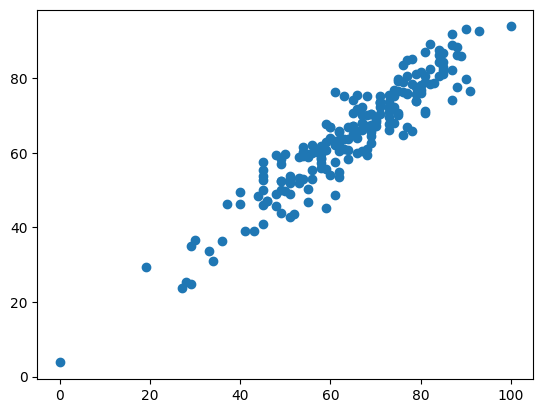

In [27]:
plt.scatter(y_test,y_pred)


<Axes: xlabel='math score'>

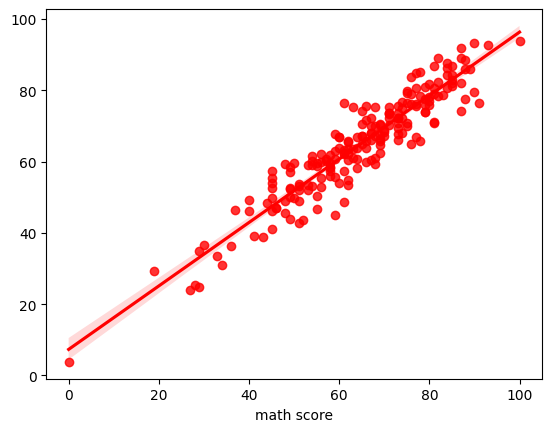

In [28]:
sns.regplot(x=y_test, y=y_pred, color='red')